In [52]:
import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Imorting Seaborn library

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation
from sklearn.preprocessing import StandardScaler
from scipy.stats import gaussian_kde

In [53]:
data = pd.read_csv(r'C:\Users\Hoang Phuong\OneDrive - University of Calgary\Win 2022 3rd year\Bmen 415\Volumetric_features.csv')

In [54]:
# Data split
X = data.iloc[1:1220,1:139]
y =  data.iloc[1:1220:,139]


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# data.info()

# data.head()

# data.tail()

# data.describe()

y.tail()

1215    78
1216    79
1217    80
1218    81
1219    82
Name: Age, dtype: int64

# Multiple linear regression (MLR)

Testing Accuracy for Multiple Linear Regression Model:  61.23445655219973
RMSE for Testing Data:  3.0066632130978235
Mean Absolute Error for Testing Data: 2.28 degrees.


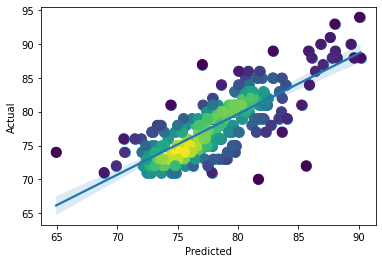

In [55]:
from sklearn.linear_model import LinearRegression

multiple_linear_reg = LinearRegression(fit_intercept=False)
multiple_linear_reg.fit(x_train, y_train)

y_pred_MLR_train = multiple_linear_reg.predict(x_train)
y_pred_MLR_test = multiple_linear_reg.predict(x_test)
error = abs(y_pred_MLR_test - y_test)

accuracy_MLR_test = r2_score(y_test, y_pred_MLR_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_test*100)

RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_pred_MLR_test))
print("RMSE for Testing Data: ", RMSE_MLR_test)

error = abs(y_pred_MLR_test - y_test)
print('Mean Absolute Error for Testing Data:', round(np.mean(error), 2), 'degrees.')


XY = np.vstack([y_pred_MLR_test,y_test])
z = gaussian_kde(XY)(XY)
fig, ax = plt.subplots()
sns.regplot(x=y_pred_MLR_test ,y=y_test, fit_reg=True, scatter_kws={"s": 100})
ax.scatter(x=y_pred_MLR_test,y=y_test, c=z, s=100)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

# K-nearest Neighbours Regression

Testing Accuracy for Random Forest Model:  68.5765404461654
RMSE for Testing Data:  2.7070036668721045
Mean Absolute Error for Testing Data: 1.61 degrees.


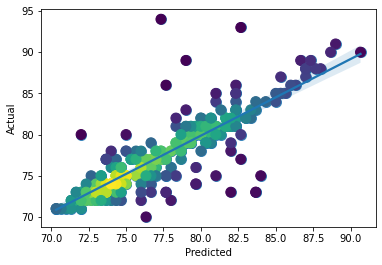

In [56]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train, y_train)

y_pred_knn_test = knn.predict(x_test)

accuracy_knn_test = r2_score(y_test, y_pred_knn_test)
print("Testing Accuracy for Random Forest Model: ", accuracy_knn_test*100)

RMSE_knn_test = sqrt(mean_squared_error(y_test, y_pred_knn_test))
print("RMSE for Testing Data: ", RMSE_knn_test)

error = abs(y_pred_knn_test - y_test)
print('Mean Absolute Error for Testing Data:', round(np.mean(error), 2), 'degrees.')


XY2 = np.vstack([y_pred_knn_test,y_test])
z = gaussian_kde(XY2)(XY2)
fig, ax = plt.subplots()
sns.regplot(x=y_pred_knn_test ,y=y_test, fit_reg=True, scatter_kws={"s": 100})
ax.scatter(x=y_pred_knn_test,y=y_test, c=z, s=100)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

Testing Accuracy for Random Forest Model:  83.86508780435102
RMSE for Testing Data:  1.939747267845673
Mean Absolute Error for Testing Data: 1.48 degrees.


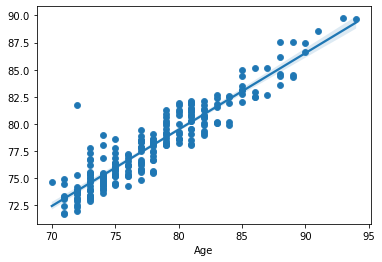

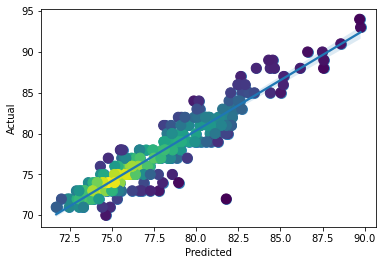

In [57]:
from sklearn.ensemble import RandomForestRegressor

randomforest = RandomForestRegressor(n_estimators = 1000, random_state = 42)
randomforest.fit(x_train, y_train)

y_pred_randomforest_test = randomforest.predict(x_test)

accuracy_randomforest_test = r2_score(y_test, y_pred_randomforest_test)
print("Testing Accuracy for Random Forest Model: ", accuracy_randomforest_test*100)

RMSE_randomforest_test = sqrt(mean_squared_error(y_test, y_pred_randomforest_test))
print("RMSE for Testing Data: ", RMSE_randomforest_test)

error = abs(y_pred_randomforest_test - y_test)
print('Mean Absolute Error for Testing Data:', round(np.mean(error), 2), 'degrees.')

sns.scatterplot(x=y_test, y=y_pred_randomforest_test)
sns.regplot(x=y_test, y=y_pred_randomforest_test)

XY2 = np.vstack([y_pred_randomforest_test,y_test])
z = gaussian_kde(XY2)(XY2)
fig, ax = plt.subplots()
sns.regplot(x=y_pred_randomforest_test ,y=y_test, fit_reg=True, scatter_kws={"s": 100})
ax.scatter(x=y_pred_randomforest_test,y=y_test, c=z, s=100)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()